<a href="https://colab.research.google.com/github/Pramitreddy17/ML/blob/main/practical%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
data =pd.read_csv('House-Price-Predict.csv')
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler




In [ ]:

data = pd.read_csv('USA Housing Dataset.csv')


print(data.head())


                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated                   stre

In [ ]:

X = data[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'yr_built', 'condition', 'yr_renovated', 'floors']]  # Independent variables
y = data['price']  # Target variable



data.dropna(inplace=True)
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

model = LinearRegression()


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

In [ ]:

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 169138.25856039373


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 66120531790.968285


In [ ]:
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 257139.1292490668


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.3692922107127694


MAE: 169138.25856039373
MSE: 66120531790.968285
RMSE: 257139.1292490668


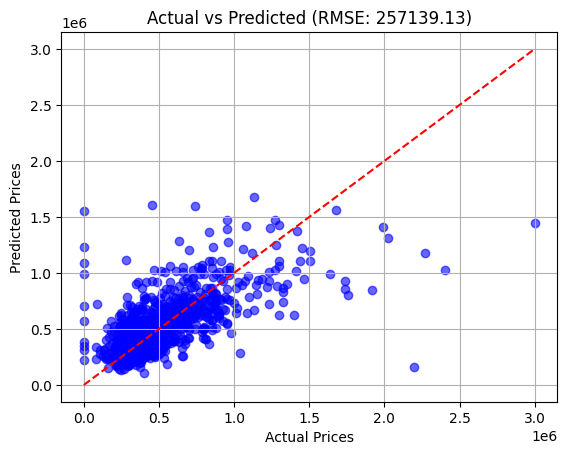

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title(f'Actual vs Predicted (RMSE: {rmse:.2f})')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


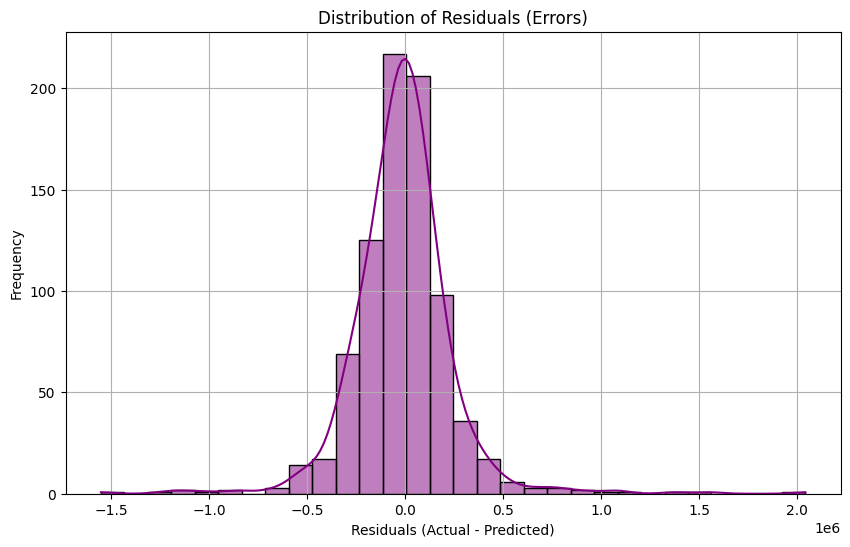

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
